
# Exploratory Data Analysis Notebook

This notebook is going to be comprised of several different sections:

1. Reading and cleaning the data from CSV file
2. Dataframe seperation stuff age height weight
3. Understanding our research group (n=126) population visually, representing their demographics in terms of gender, age, preferred climbing discipline and something else??
4. Something else
5. Something else lol


In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## Introduction Section

For our data analysis, I wanted to start by trying to understand our research group by representing some basic demographics
To represent this, a series of charts were created, visualizing information such as gender, age, and preferred climbing disciplines.



In [7]:
dataframe = pd.read_csv('Climbing Critical Force Data - Giles et al 2020.csv')
dataframe = dataframe.dropna(axis=1, how='all')
dataframe = dataframe.dropna(axis=0, how='all')
dataframe


,#,SEX,AGE (YRS),HEIGHT (CM),BODY MASS (KG),YRS CLIMBING,CLIMB HRS WEEK,TRAIN HRS WEEK,SPORT GRADE IRCRA,BOULDER GRADE IRCRA,# REPS,PEAK FORCE (KG),PEAK FORCE % BODY MASS,CF (KG),CF % PEAK FORCE,CF % BODY MASS,40% MVC (KG),W' (KG),W' PER KG BODY MASS
0,0.0,Female,38.0,164.0,56.5,10.0,3.0,0.0,NaN,19.0,24.0,33.28,58.9%,12.85,38.6%,22.7%,9.98,579.31,10.25
1,1.0,Female,28.0,157.5,56.1,13.0,14.0,4.0,NaN,21.5,24.0,42.01,74.9%,13.52,32.2%,24.1%,16.80,1088.38,19.40
2,2.0,Female,26.0,159.0,51.8,2.0,5.0,0.8,NaN,17.0,24.0,39.73,76.7%,11.08,27.9%,21.4%,15.89,884.00,17.06
3,3.0,Female,26.0,169.0,56.3,8.0,6.0,2.0,15.0,19.0,24.0,33.31,59.2%,7.84,23.5%,13.9%,13.32,463.40,8.23
4,4.0,Female,22.0,173.5,71.8,8.0,9.0,2.0,NaN,20.5,24.0,50.55,70.4%,16.84,33.3%,23.5%,20.22,968.50,13.49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,193.0,Male,22.0,183.0,84.9,4.0,10.0,2.0,15.0,19.0,24.0,67.00,78.9%,19.25,28.7%,22.7%,26.80,1557.18,18.34
117,195.0,Male,42.0,167.5,73.9,5.0,3.0,4.0,16.0,20.0,24.0,48.40,65.5%,16.22,33.5%,21.9%,19.36,1457.57,19.72
118,198.0,Male,31.0,174.8,61.9,4.0,6.0,1.0,NaN,20.0,24.0,60.30,97.4%,19.58,32.5%,31.6%,24.12,1290.73,20.85
119,200.0,Female,24.0,165.3,56.8,NaN,NaN,NaN,21.0,NaN,24.0,62.90,110.7%,12.75,20.3%,22.4%,25.16,1965.03,34.60


## Charts for Gender, Age with Pandas plotting


SEX
Female    56
Male      65
dtype: int64


<AxesSubplot:ylabel='Gender'>

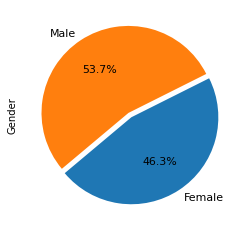

In [261]:
# #gender pie chart

gender_explode = (0.03,0.03)

#removed new dataframe
gender_pie = dataframe.groupby(by='SEX').size()
print(gender_pie)
gender_pie.plot.pie(autopct="%.1f%%", fontsize=11, label="Gender", explode=gender_explode, startangle = 220)


          AGE (YRS)
38 to 60          9
31 to 38         16
24 to 31         56
17 to 24         39


<AxesSubplot:>

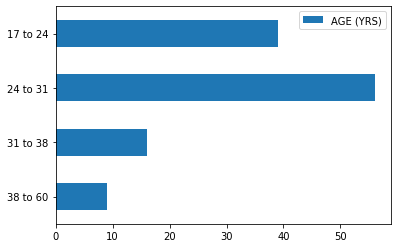

In [259]:
age_bin_labels = ['17 to 24', '24 to 31', '31 to 38', '38 to 60']
age_bin = (pd.cut(dataframe['AGE (YRS)'],bins=4, labels = age_bin_labels).value_counts().sort_index(ascending=False)).to_frame()
print(age_bin)
age_bin.plot(kind='barh')

## Seaborn Scatterplot Height (CM) vs Weight (KG)


<AxesSubplot:xlabel='HEIGHT (CM)', ylabel='BODY MASS (KG)'>

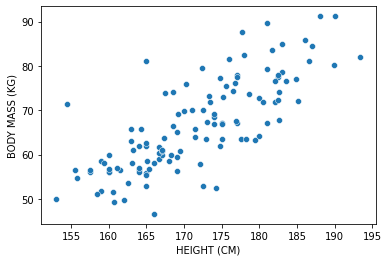

In [256]:
# Using same original dataframe

#Create Seaborn Scatterplot
sns.scatterplot(data = dataframe[['HEIGHT (CM)','BODY MASS (KG)']].dropna(), x="HEIGHT (CM)", y="BODY MASS (KG)")

## Seaborn Barchart Climbing Discipline Sport vs Bouldering vs Both




In [257]:
# TO FIND VALUES FOR BOTH

dataframe[['SPORT GRADE IRCRA', 'BOULDER GRADE IRCRA']].dropna().count().to_frame()

,0
SPORT GRADE IRCRA,31
BOULDER GRADE IRCRA,31


[(0.0, 120.0)]

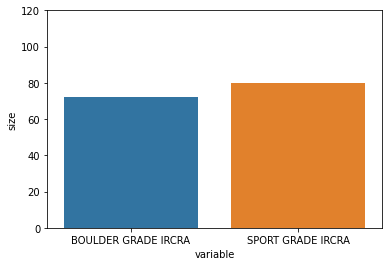

In [258]:
#Changed to original dataframe

#Using pd.melt to extend the pivot, to long format which creates a variable and value column that you can refer to.
#Identifier is the #, aka index and gets overwritten by ylim
disciplines_bar = pd.melt(dataframe[['#','SPORT GRADE IRCRA', 'BOULDER GRADE IRCRA']],id_vars="#").dropna()
disciplines_bar = disciplines_bar.groupby(by='variable',as_index=False).size()

ax3 = sns.barplot(data=disciplines_bar, x="variable", y="size")
ax3.set(ylim=(0,120))
#Set ylim to 120 honestly to make the graph pretty, and have upper limit of people
